In [1]:
import draw2Svg as dw

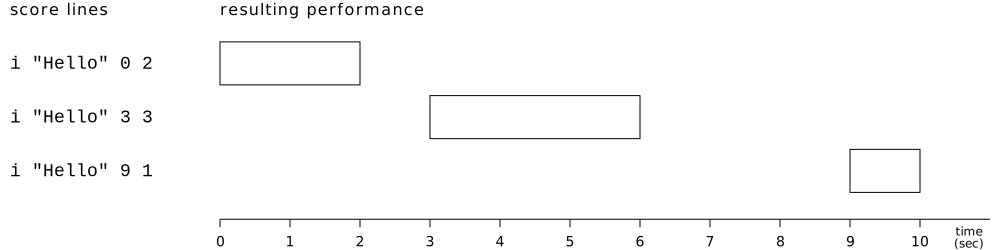

In [45]:
w,h = 1000,250
d = dw.Drawing(w,h)

xnum = 15 # posts (= one more than divisions)
ynum = 5
mleft = 10
mright = 10
mtop = 15
mbot = 20
xsize = w-mleft-mright
ysize = h-mtop-mbot
xunit = xsize / (xnum-1)
yunit = ysize / (ynum-1)

exec(open('draw2Svg_funs.py').read())

textsiz = 14

def xgrid(inval):
    """for xnum=4, inval is from 0 (left) to 3 (right)
    as range to write"""
    return scale(inval,0,xnum-1,mleft,mleft+xsize)

def ygrid(inval):
    """for num=11, inval is from 0 (top) to 10 (bottom)
    as range to write"""
    return scale(inval,0,ynum-1,mtop,mtop+ysize)

# titles for both columns
tsiz = 16
y = ygrid(0)
sp = 1.25
d.append(dw.Text('score lines',tsiz,xgrid(0),y,letter_spacing=sp))
d.append(dw.Text('resulting performance',tsiz,xgrid(3),y,letter_spacing=sp))

# score lines
tsiz = 18
x = xgrid(0)
d.append(dw.Text('i "Hello" 0 2',tsiz,x,ygrid(1),font_family='courier'))
d.append(dw.Text('i "Hello" 3 3',tsiz,x,ygrid(2),font_family='courier'))
d.append(dw.Text('i "Hello" 9 1',tsiz,x,ygrid(3),font_family='courier'))

# time scale
y = ygrid(3.8)
ticklen = 8
tsiz = 14
d.append(dw.Line(xgrid(3),y,xgrid(14),y,stroke='black'))
for i in range(3,14):
    x = xgrid(i)
    tick(x,y,ticklen)
    d.append(dw.Text('%d'%(i-3),tsiz,x,ygrid(4.3),text_anchor='middle'))
d.append(dw.Text(['time','(sec)'],tsiz-2,xgrid(13.7),ygrid(4.1),text_anchor='middle'))

# instrument instances
yindx = 1
for start,dur in zip([0,3,9],[2,3,1]):
    x = xgrid(start+3)
    y = ygrid(yindx-.5)
    d.append(dw.Rectangle(x,y,dur*xunit,yunit*.8,stroke='black',fill='none'))
    yindx += 1

d.savePng('../../images/01-GS-07-a.png')
d